### Introduction
* The given requirement is to prepare a collection of text documents for use within a sentiment analysis algorithm.
* The given dataset is comprised of 1000 positive and 1000 negative movie reviews in the form of text documents for each movie review.  
The steps we follow to address the given problem are:  
* Extract the content from 2000 text documents
* Apply pre-processing techniques to strip out punctuation, stop words and “tokenize” the data.  
* Construct the term-document matrix with proper labelling.
* Preparing a pandas dataframe from the above term-document matrix to make it ready for use within a classification model.

### Data Preparation

* Load the directories **pos** and **neg** each containing 1000 movie reviews in the form of .txt files into GitHub repository.
* After loading the positive and negative movie review directories to github repository, in order to read the files present in these directories we perform web scraping techinque by downloading the page using a **GET** request on the github url https://github.com/NNikhil89/TextMining/tree/main/pos and https://github.com/NNikhil89/TextMining/tree/main/neg  
* Once we get the response from the above url we parse it using html parser. 
* In the parsed response we can find that the movie review file names are present under a script tag with attribute key as **data-target** and its respective value is **react-app.embeddedData**.
* The contents inside this specific script tag are present in json format, therefore we parse the text under script tag to json format and read the filenames present under the **items** section present in the parsed json.
* Then iterate through each file name in the items section, and for each iteration we form the github url by appending the file name to the url https://raw.githubusercontent.com/NNikhil89/TextMining/main/ so that when we do a **GET** request on this url we get the contents of the file. This process is performed for all the files present in both positive and negative directories.
* Add the contents of both positive review files and negative review files in a list named as **combinedMovieReviews** and mark their respective review labels as **Positive** and **Negative**. 
* Save the review labels in list named as **combinedMovieLabels**.
* After creating the above two lists with one containing movie reviews and the other with review labels, perform the process of tokenization for each of the movie review by performing necessary pre-processing techniques such as striping out punctuation and numbers by using **RegexpTokenizer** from nltk.tokenize library and by removing stop words by using importing **stopwords** from nltk.corpus library, **tokenize** the data, etc. 
* We have created the function **funcToTokenizeWords** which handles the tokenizing operation.
* Save the tokens formed after processing the movie reviews in a set **lstofwordtokens** so that the tokens remain unique as they are used to form the columns for the term-document matrix.
* Construct **term_document_matrix** with number of rows as the number of movie review files which includes both positive and negative reviews.
* The row count for the term-document matrix is 2000, and the number of columns of the term-document matrix is the number of elements in the set **lstofwordtokens**. 
* By default all the elements of the term-document matrix are intialized with zero.
* Update the frequency of occurence of tokens in the term-document matrix using below steps:  
 1.Iterate over each movie review from combinedMovieReviews list  
 2.Convert the movie review into tokens by applying the pre-processing techniques defined in the method **funcToTokenizeWords**  
 3.Foreach token present in the movie review, we find the number of occurences of the token in the respective movie review and update its count in the term-document-matrix, by considering the row index of the matrix as the index of the respective movie review from the **combinedMovieReviews** list.
 
* After updating the frequency count for all the tokens in term-document matrix we convert the term-document matrix to a pandas dataframe and add a new column **Movie Review** to this dataframe which indicates whether each given movie review is **Positive** or **Negative**.

#### Importing libraries

In [144]:
import json
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### Defining movieReviewsExtractor method which performs web scraping

In [145]:
def movieReviewsExtractor(directoryPath, rawFilePath, reviewLabel):
    ''' this function performs web scraping techinque by downloading the page 
    using a GET request on the github url present in the parameter directoryPath.
    Once we get the response from the above url we parse it using html parser.
    From the parsed response we extract the movie review file names present under a script tag 
    with attribute key as data-target and its respective value is react-app.embeddedData.    
    Then iterate through each file name in the items section of the script tag, 
    and for each iteration we form the github url by appending the file name to the url present in parameter rawFilePath.
    Then save all the contents of moviereview and its labels in two lists.'''
    
    movieReviews = [] # list to store moview reviews
    reviewLabels = [] # list to store moview review labels
    
    response = requests.get(directoryPath)
    soup = BeautifulSoup(response.content, 'html.parser')
    scriptTagWithFileNames = soup.find_all('script', attrs={'data-target': 'react-app.embeddedData'})

    for script in scriptTagWithFileNames:
        jsonText = json.loads(script.text)
        jsonItemsSection = jsonText['payload']['tree']['items']
        
        for index, item  in enumerate(jsonItemsSection):            
            filePath = item['path']
            rawFileUrl = rawFilePath + filePath
            fileResponse = requests.get(rawFileUrl)
            filetext = fileResponse.text
            movieReviews.append(filetext)
            reviewLabels.append(reviewLabel)
                                                                        
    return movieReviews, reviewLabels

#### Assigning github repository urls in order to extract positive movie reviews

In [146]:
positiveReviewDirectory = 'https://github.com/NNikhil89/TextMining/tree/main/pos' #Directory path for Positive movie review
movieReviewsFilePath = 'https://raw.githubusercontent.com/NNikhil89/TextMining/main/' #file format for each movie review
positiveLabel = 'Positive' #Positive movie review label
#calling movieReviewsExtractor to extract positive movie reviews
positiveMovieReviews, positiveLabels = movieReviewsExtractor(positiveReviewDirectory, movieReviewsFilePath, positiveLabel)

In [126]:
len(positiveMovieReviews)

1000

#### Assigning github repository urls in order to extract positive movie reviews

In [47]:
negativeReviewDirectory = 'https://github.com/NNikhil89/TextMining/tree/main/neg' #Directory path for Negative movie review
movieReviewsFilePath = 'https://raw.githubusercontent.com/NNikhil89/TextMining/main/' #file format for each movie review
negativeLabel = 'Negative' #Negative movie review label
#calling movieReviewsExtractor to extract negative movie reviews
negativeMovieReviews, negativeLabels = movieReviewsExtractor(positiveReviewDirectory, filePathPositiveMovie, negativeLabel)

In [49]:
len(negativeMovieReviews)

1000

#### Combining both positiveMovieReviews and negativeMovieReviews to form the list combinedMovieReviews

In [60]:
combinedMovieReviews = positiveMovieReviews+negativeMovieReviews

In [127]:
len(combinedMovieReviews)

2000

#### Combining both positiveLabels and negativeLabels to form the list combinedMovieLabels

In [72]:
combinedMovieLabels = positiveLabels + negativeLabels

In [73]:
len(combinedMovieLabels)

2000

#### Initializing tokenizer and en_stops

In [128]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
en_stops = set(stopwords.words('english'))

#### Defining function funcToTokenizeWords to tokenize the movie review

In [52]:
def funcToTokenizeWords(movieReview):
    ''' this function removes English language stop words + punctuation from 
    the given movie review and then creates a list using the remaining words.'''
    
    words_clean = [] #list to store tokenized words   
    tokenizedWords = tokenizer.tokenize(movieReview) #in-built method to tokenize the text   

    # iterate through each word in the list
    for word in tokenizedWords:
        # convert all characters to lowercase for consistency
        word = word.lower()

        # if the word is not a stop word and is not a punctuation character add it to clean word list
        # note that the list 'en_stops' was defined above in the section discussing stopwords        
        if word not in en_stops and word not in string.punctuation:
            words_clean.append(word)        
    
    return words_clean

* Calling the method funcToTokenizeWords for all the movie reviews and storing them in set lstofwordtokens

In [61]:

lstofwordtokens = set() # set to store the tokens for all the movie reviews
#calling the function funcToTokenizeWords
lstofwordtokens = sorted(set().union(*(funcToTokenizeWords(movieReview) for movieReview in combinedMovieReviews)))

In [129]:
len(lstofwordtokens)

38760

#### Creating term-document-matrix

* There are total of 38760 unique tokens formed after performing pre-processing and then tokenizing the 2000 movie reviews.
* These tokens are sorted in alphabetical order and stored in a set, form the columns of term-matrix-document matrix.
* Therefore the number of columns in term-document-matrix will be 38760
* The number of rows in term-document-matrix will be total number of movie reviews which is 2000
* Using these inferences we can create the term-document-matrix with all elements initialized to 0 using below code 

In [64]:
term_document_matrix = [[0] * len(lstofwordtokens) for _ in range(len(combinedMovieReviews))]

#### Updating term_document_matrix with frequency counts of tokens

In [ ]:
for i, movieReview in enumerate(combinedMovieReviews): #enumerating on combinedMovieReviews list
    lstTokenizedWords = funcToTokenizeWords(movieReview) # calling funcToTokenizeWords for each movie review
    
    for tokenizedWord in lstTokenizedWords: # iterating over each token of the given movie review
        if tokenizedWord in lstofwordtokens: # checking if the token is present in the set of unique  tokens
            term_document_matrix[i][lstofwordtokens.index(tokenizedWord)] += 1 #updating the token's count in for the given review in the term-document matrix

#### Creating DataFrame from term_document_matrix

In [76]:
term_document_df = pd.DataFrame(term_document_matrix, columns=lstofwordtokens)
term_document_df['Movie Review'] = combinedMovieLabels  # Add a column for labels
term_document_df.head()

,aa,aaa,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaaahhhs,aahs,aaliyah,aalyah,aamir,...,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz,Movie Review
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


#### Creating Numpy array

* Converting pandas dataframe consisting of frequency counts of tokens to numpy array using to_numpy method.
* When converting the dataframe to numpy array, we exclude the last column from dataframe which is Movie Review column consisting of review labels

In [77]:
term_doc_np_array = term_document_df.iloc[:, :-1].to_numpy()

In [78]:
term_doc_np_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Calculating Sparsity

* We calculate the sparsity of term-document-matrix using the numpy array **term_doc_np_array** that was created in the above cell
* For calculating sparsity, consider the size property of numpy array which gives us the total number of entries in the numpy array
* Calculate the total number of zero entries in the numpy array using **count_nonzero** function by passing the parameter which signifies the **term_doc_np_array** where all the array elements are 0
* Then sparsity is calculated as percentage of total number of zero entries divided by total number of entries in the numpy array

In [80]:
totalEntriesCount = term_doc_np_array.size

# Calculate the count of zero entries in the matrix
zero_entry_records = np.count_nonzero(term_doc_np_array == 0)

# Calculate the sparsity of the matrix (percentage of zero entries)
sparsity = (zero_entry_records / totalEntriesCount) * 100

# Print the sparsity percentage
print(f"The sparsity of the term-document matrix is: {sparsity:.2f}%")

The sparsity of the term-document matrix is: 99.31%


#### Frequency Distribution plot for top 30 words in positive reviews

To plot the frequency distribution for the 30 words which occur most frequently in the positive reviews we use the below steps:  
* Filter the dataframe **term_document_df** with Positive movie reviews
* Excluding the last column **Movie Review** from the above filtered dataframe, calculate the sum of frequency counts for each column by summing all the rows. 
* This creates a pandas series which lists all the columns along with their sum of frequency counts.
* Sort the pandas series in descending order and pick the top 30 rows which gives the top 30 frequently occuring words from the list of positive reviews. 
* Plot a frequency distribution for the top 30 words as shown below.

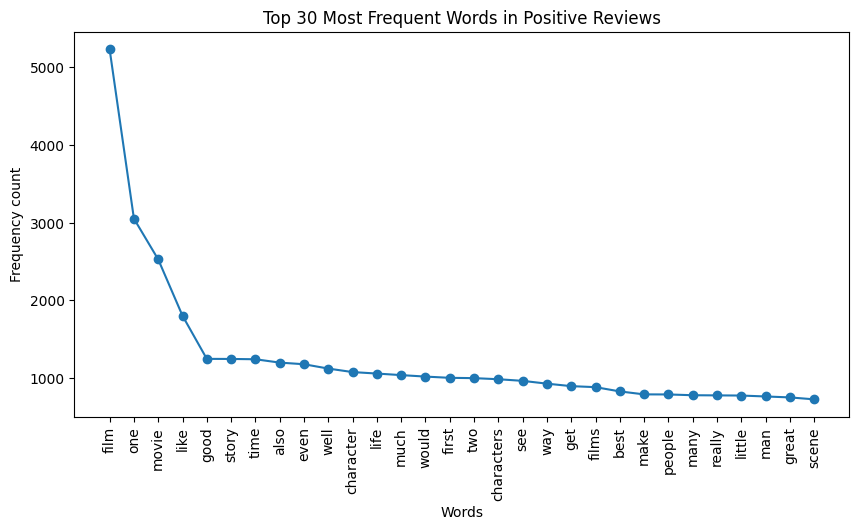

In [132]:
positive_movies_df = term_document_df[term_document_df['Movie Review'] == 'Positive'] #Filtering the term_document_df with Positive movie reviews

posreview_words_freq = positive_movies_df.iloc[:, :-1].sum(axis=0)  #Exclude the 'Movie Review' column and sum along rows

sorted_poswords = posreview_words_freq.sort_values(ascending=False) # Sort the column frequnecies in descending order

top_positive_words = sorted_poswords.head(30) #Select the top 30 words

plt.figure(figsize=(10, 5))
top_positive_words.plot(marker='o', linestyle='-')  # 'o' for points, '-' for lines

# Setting the ticks on the x-axis to show each index
plt.xticks(range(len(top_positive_words)), top_positive_words.index, rotation=90) 
plt.title('Top 30 Most Frequent Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency count')
plt.show()

From the above frequency distribution plot for the top 30 words in positive reviews, we can infer the below:  
* Words having positive tone repeat frequently in the positive movie reviews
* Words such as like, good, well, best and great indicates positivity and they occur most frequently in the postive movie reviews.
* This indicates customers using these words and other related words in a positive tone when they like a movie.
* Our classification model can use these kind of words to label it as a positive when revewing a new comment posted by the customer.

#### Frequency Distribution plot for top 30 words in negative reviews

To plot the frequency distribution for the 30 words which occur most frequently in the negative reviews we use the below steps:  
* Filter the dataframe **term_document_df** with Negative movie reviews.
* Excluding the last column **Movie Review** from the above filtered dataframe, calculate the sum of frequency counts for each column by summing all the rows.
* This creates a pandas series which lists all the columns along with their sum of frequency counts.
* Sort the pandas series in descending order and pick the top 30 rows which gives the top 30 frequently occuring words from the list of negative reviews. 
* Plot a frequency distribution for the top 30 words as shown below.

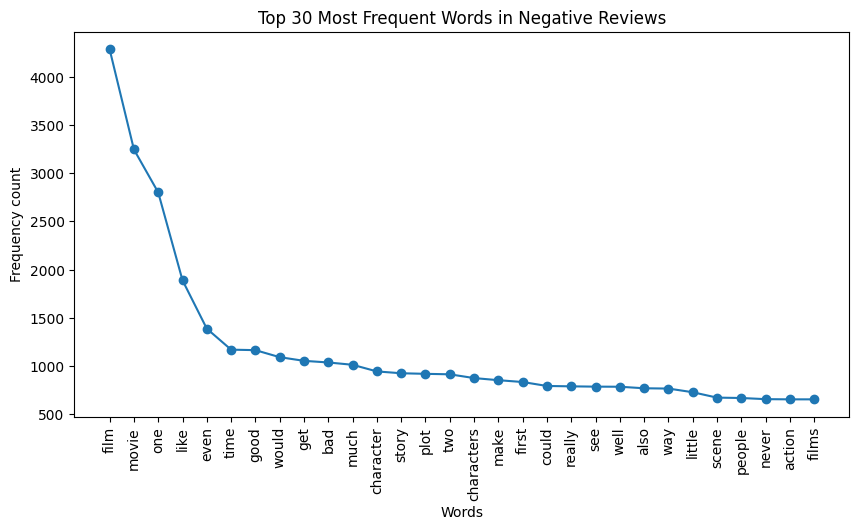

In [133]:
negative_movies_df = term_document_df[term_document_df['Movie Review'] == 'Negative'] #Filtering the term_document_df with Negative movie reviews

negreview_words_freq = negative_movies_df.iloc[:, :-1].sum(axis=0)  #Exclude the 'Movie Review' column and sum along rows

sorted_negwords = negreview_words_freq.sort_values(ascending=False) # Sort the column frequnecies in descending order

top_negative_words = sorted_negwords.head(30) #Select the top 30 words

plt.figure(figsize=(10, 5))
top_negative_words.plot(marker='o', linestyle='-')  # 'o' for points, '-' for lines

# Setting the ticks on the x-axis to show each index
plt.xticks(range(len(top_negative_words)), top_negative_words.index, rotation=90) 
plt.title('Top 30 Most Frequent Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency count')
plt.show()

From the above frequency distribution plot for the top 30 words in negative reviews, we can infer the below:  
* Words having negativity repeat frequently in the negative movie reviews
* Words such as bad, could, little and never indicates negative tone and they occur most frequently in the negative movie reviews.
* This indicates customers using these words and other related words in a negative tone when they dislike a movie.
* Our classification model can use these kind of words to label it as a negative when revewing a new comment posted by the customer.

#### Splitting Dataframe to Training and Test

* We use the **train_test_split** method from sklearn.model_selection library inorder to randomly sample vectors to training and test datasets.
* Here we pass the dataframe **term_document_df** as an input to train_test_split and pass test_size as 0.25 which splits the input dataframe to 75% of training dataset and 25% of test dataset.
* we have set random_state=42 to ensure reproducibility of the split.

In [137]:
# Split the data into training (75%) and testing (25%) subsets
df_train, df_test = train_test_split(term_document_df, test_size=0.25, random_state=42)

# Display the number of documents in training and testing subsets
print("Number of documents in training subset:", len(df_train))
print("Number of documents in testing subset:", len(df_test))



Number of documents in training subset: 1500
Number of documents in testing subset: 500


* Top 10 rows from training dataset

In [141]:
df_train.head(10)

,aa,aaa,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaaahhhs,aahs,aaliyah,aalyah,aamir,...,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz,Movie Review
1738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
1607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
1939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
1481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
1160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative


* Top 10 rows from test dataset

In [140]:
df_test.head(10)

,aa,aaa,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaaahhhs,aahs,aaliyah,aalyah,aamir,...,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz,Movie Review
1860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative


#### Positive and Negative reviews in Training Dataset

In [142]:
df_train_Positive = df_train[df_train['Movie Review'] == 'Positive'] #Filtering training dataset with positive reviews
df_train_Negative = df_train[df_train['Movie Review'] == 'Negative'] #Filtering training dataset with negative reviews

# Display the number of positive and negative reviews in each dataset
print("Number of positive reviews in training dataset ", len(df_train_Positive))
print("Number of negative reviews in training dataset ", len(df_train_Negative)) 


Number of positive reviews in training dataset  743
Number of negative reviews in training dataset  757


#### Positive and Negative reviews in Test Dataset

In [143]:
df_test_Positive = df_test[df_test['Movie Review'] == 'Positive'] #Filtering test dataset with positive reviews
df_test_Negative = df_test[df_test['Movie Review'] == 'Negative'] #Filtering test dataset with negative reviews

# Display the number of positive and negative reviews in each dataset
print("Number of positive reviews in test dataset ", len(df_test_Positive))
print("Number of negative reviews in test dataset ", len(df_test_Negative)) 

Number of positive reviews in test dataset  257
Number of negative reviews in test dataset  243


* From the above count of positive and negative reviews in both training and test datasets, we can confirm that the positive and negative reviews appear to be relatively balanced within each of the training and test datasets.
* This plays a vital role in model building in order to prevent skewing and overfitting.
* The formed datasets are balanced and are ready for use in model building.